## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

- Elijo el data set de Demographics of Academy Awards (Oscars) Winners
- El objetivo será realizar un modelo XXX para lograr XXXX

In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza 

In [2]:
# Cargar el dataset
data = pd.read_csv('Oscars-demographics-DFE.csv', encoding='ISO-8859-1')

In [3]:
len(data)

441

In [4]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [6]:

data['religion:confidence'].value_counts()

religion:confidence
1.0000    426
0.6897      5
0.6667      3
0.3333      2
0.9630      1
0.6571      1
0.9624      1
0.6562      1
0.9597      1
Name: count, dtype: int64

In [7]:
data['race_ethnicity:confidence'].value_counts()

race_ethnicity:confidence
1.0000    439
0.6571      1
0.9594      1
Name: count, dtype: int64

In [8]:
data['date_of_birth:confidence'].value_counts()

date_of_birth:confidence
1.0000    433
0.6667      3
0.9597      1
0.6562      1
0.9648      1
0.9596      1
0.9631      1
Name: count, dtype: int64

In [9]:
data['birthplace:confidence'].value_counts()

birthplace:confidence
1.0000    433
0.6667      5
0.9595      1
0.6571      1
0.9593      1
Name: count, dtype: int64

### 🔍 Filtrado por consistencia total en columnas de confianza

Para asegurar que el dataset contenga únicamente registros con alta confiabilidad, se realiza un filtrado estricto basado en las columnas que terminan en `:confidence`. Estas columnas representan el nivel de confianza asignado por la plataforma de anotación a distintos campos del dataset (por ejemplo, religión, raza, orientación sexual, etc.).

**Criterio aplicado:**

- Se conservan exclusivamente aquellas filas en las que **todas las columnas `:confidence` tienen valor exactamente igual a `1.0`**, lo que indica validación total y certeza en todos los campos considerados críticos.
- Todas las demás filas —aquellas con algún valor menor a 1.0 en cualquier columna `:confidence`— son eliminadas por considerarse inciertas o incompletas.

Una vez aplicado el filtro, se eliminan completamente las columnas `:confidence` del dataset, ya que han cumplido su función de validación.

Se reporta la cantidad de filas y columnas eliminadas, tanto en términos absolutos como porcentuales, para mantener un registro transparente del proceso de depuración.


In [10]:
# 1. Identificar columnas de confianza
cols_conf = [col for col in data.columns if col.endswith(':confidence')]

# 2. Guardar estado inicial
n_filas_inicial = data.shape[0]
n_columnas_inicial = data.shape[1]

# 3. Filtro estricto: mantener solo filas donde TODAS las columnas de confianza sean == 1.0
filtro_confianza = data[cols_conf].eq(1.0).all(axis=1)
data = data[filtro_confianza].copy()

# 4. Eliminar columnas de confianza ya innecesarias
data.drop(columns=cols_conf, inplace=True)

# 5. Reportar impacto
n_filas_final = data.shape[0]
n_columnas_final = data.shape[1]
filas_eliminadas = n_filas_inicial - n_filas_final
columnas_eliminadas = len(cols_conf)

print(f"🔎 Filas iniciales: {n_filas_inicial}")
print(f"✅ Filas eliminadas: {filas_eliminadas} ({filas_eliminadas / n_filas_inicial:.2%})")
print(f"📊 Filas finales: {n_filas_final}")
print()
print(f"🔎 Columnas iniciales: {n_columnas_inicial}")
print(f"✅ Columnas eliminadas: {columnas_eliminadas} ({columnas_eliminadas / n_columnas_inicial:.2%})")
print(f"📊 Columnas finales: {n_columnas_final}")


🔎 Filas iniciales: 441
✅ Filas eliminadas: 52 (11.79%)
📊 Filas finales: 389

🔎 Columnas iniciales: 27
✅ Columnas eliminadas: 6 (22.22%)
📊 Columnas finales: 21


In [11]:
data['_trusted_judgments'].value_counts()
#No le veo utilidad, eliminar

_trusted_judgments
3     377
86      2
91      2
82      1
90      1
62      1
75      1
89      1
85      1
76      1
92      1
Name: count, dtype: int64

In [12]:

data.drop(columns=['_trusted_judgments'], inplace=True)

In [13]:
data['_last_judgment_at'].value_counts()
#tampoco tiene una utilidad suficiente, eliminar 

_last_judgment_at
2/10/15 1:59    24
2/10/15 2:05    24
2/10/15 2:04    24
2/10/15 1:51    19
2/10/15 2:03    18
2/10/15 2:00    14
2/10/15 2:02    12
2/10/15 3:50    12
2/10/15 1:55    10
2/10/15 2:18    10
2/10/15 2:10     8
2/10/15 1:46     8
2/10/15 2:01     8
2/10/15 2:08     8
2/10/15 1:56     8
2/10/15 1:57     8
2/10/15 1:49     8
2/10/15 2:11     8
2/10/15 1:53     7
2/10/15 2:14     7
2/10/15 4:08     7
2/10/15 2:06     7
2/10/15 1:52     7
2/10/15 2:15     7
2/10/15 2:07     7
2/10/15 2:12     7
2/10/15 4:02     6
2/10/15 4:07     6
2/10/15 3:56     4
2/10/15 3:57     4
2/10/15 4:21     4
2/10/15 3:58     4
2/10/15 1:48     4
2/10/15 4:14     4
2/10/15 1:47     4
2/10/15 4:06     4
2/10/15 2:29     4
2/10/15 1:58     4
2/10/15 2:13     4
2/10/15 2:09     4
2/10/15 3:51     4
2/10/15 2:19     4
2/10/15 3:48     4
2/10/15 1:43     4
2/10/15 3:53     4
2/10/15 3:45     4
2/10/15 3:55     3
2/10/15 2:16     3
Name: count, dtype: int64

In [14]:
data.drop(columns=['_last_judgment_at'], inplace=True)  

In [15]:
data['_unit_state'].value_counts()
#No le veo utilidad, eliminar

_unit_state
finalized    377
golden        12
Name: count, dtype: int64

In [16]:
data.drop(columns=['_unit_state'], inplace=True)

### 🛠️ Aplicación de correcciones manuales (_gold) y depuración

El dataset incluye columnas con sufijo `_gold`, las cuales representan valores corregidos manualmente por expertos en casos donde el sistema de anotación original pudo haber fallado o resultado incierto. Estas correcciones afectan variables como:

- `race_ethnicity`
- `religion`
- `sexual_orientation`
- `birthplace`
- `date_of_birth`
- `year_of_award`

#### 📌 Estrategia aplicada:

- Se reemplazó el valor original de cada columna por su correspondiente valor `_gold`, **solo si dicha corrección existía**.
- Este proceso garantiza que los datos utilizados para modelado y análisis reflejen la versión más confiable posible.
- Se contabilizó cuántas filas fueron modificadas por lo menos en una de estas columnas.
- Luego de aplicar las correcciones, se eliminaron las columnas `_gold` para mantener un dataset limpio y enfocado.

Este procedimiento es esencial para asegurar la integridad y calidad del dataset, clave para cualquier modelo de Machine Learning o análisis interpretativo posterior.


In [17]:
# 1. Identificar columnas con versión _gold
cols_gold = [col for col in data.columns if col.endswith('_gold')]

# 2. Crear lista base sin el sufijo _gold
cols_base = [col.replace('_gold', '') for col in cols_gold]

# 3. Contador de filas corregidas (al menos una corrección aplicada)
correcciones = pd.DataFrame({
    base: data[gold].notna() for base, gold in zip(cols_base, cols_gold)
})
n_filas_corregidas = correcciones.any(axis=1).sum()

print(f"🛠️ Filas con al menos una corrección aplicada: {n_filas_corregidas} ({n_filas_corregidas / data.shape[0]:.2%})")

# 4. Aplicar las correcciones: si _gold no es nulo, reemplaza; si lo es, deja el valor original
for base, gold in zip(cols_base, cols_gold):
    data[base] = data[gold].combine_first(data[base])

# 5. Eliminar columnas _gold luego de aplicar correcciones
data.drop(columns=cols_gold, inplace=True)


🛠️ Filas con al menos una corrección aplicada: 11 (2.83%)


In [18]:
#Eliminar columnas innecesarias, no usaré la URL y golden ya fue aplicado.
data.drop(columns=['_golden'], inplace=True)
data.drop(columns=['biourl'], inplace=True)   

In [19]:
data.head()

,_unit_id,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,670454353,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927.0,Best Director,Two Arabian Knights,Lewis Milestone
3,670454356,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932.0,Best Director,Skippy,Norman Taurog
4,670454357,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933.0,Best Director,Bad Girl,Frank Borzage
5,670454358,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1934.0,Best Director,Cavalcade,Frank Lloyd
6,670454359,"Bisacquino, Sicily, Italy",18-May-1897,White,Roman Catholic,Straight,1935.0,Best Director,It Happened One Night,Frank Capra


- Movie, person, no nos servirá pero lo dejamos como información anecdótica
- Calculamos la edad al recibir el premio que será nuestra variable contínua a predecir

In [20]:
# Asegurar que date_of_birth esté en formato datetime
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

# Extraer el año de nacimiento
data['birth_year'] = data['date_of_birth'].dt.year

# Calcular la edad al momento de recibir el premio
data['edad_premio'] = data['year_of_award'] - data['birth_year']

# Verificar resultado
print(data[['person', 'year_of_award', 'birth_year', 'edad_premio']].head())


            person  year_of_award  birth_year  edad_premio
0  Lewis Milestone         1927.0      1895.0         32.0
3    Norman Taurog         1932.0      1899.0         33.0
4    Frank Borzage         1933.0      1894.0         39.0
5      Frank Lloyd         1934.0      1886.0         48.0
6      Frank Capra         1935.0      1897.0         38.0


In [21]:
# Eliminamos date_of_birth ya que se relaciona directamente con la variable objetivo 
# no eliminamos year_of_award dado que no tiene porque relacionarse con la variable objetivo
data.drop(columns=['date_of_birth'], inplace=True)
data.drop(columns=['birth_year'], inplace=True) 

In [22]:
data['edad_premio'].describe()

count    70.000000
mean     49.571429
std      11.782536
min      28.000000
25%      41.250000
50%      47.000000
75%      57.000000
max      80.000000
Name: edad_premio, dtype: float64

In [23]:
# 1. Cantidad de NaN reales (missing values)
n_nan = data['edad_premio'].isna().sum()

# 2. Cantidad de valores que son solo espacios vacíos (no debería haber si es numérica, pero por seguridad)
n_espacios = data['edad_premio'].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()

# 3. Cantidad de 'Na' o 'na' como string (si quedó algún valor mal cargado)
n_na_str = data['edad_premio'].apply(lambda x: isinstance(x, str) and x.strip().lower() == 'na').sum()

# 4. Total de registros y porcentaje de completitud
total = len(data)
completos = total - (n_nan + n_espacios + n_na_str)
porcentaje_completo = completos / total * 100

# Mostrar resumen
print(f"🔍 Total filas: {total}")
print(f"❌ NaN: {n_nan}")
print(f"❌ Espacios vacíos: {n_espacios}")
print(f"❌ Strings 'na' o 'Na': {n_na_str}")
print(f"✅ Completos: {completos} ({porcentaje_completo:.2f}%)")


🔍 Total filas: 389
❌ NaN: 319
❌ Espacios vacíos: 0
❌ Strings 'na' o 'Na': 0
✅ Completos: 70 (17.99%)


In [24]:
# Función para detectar valores "vacíos": NaN, strings vacíos, solo espacios, o 'Na'
def esta_vacio(x):
    if pd.isna(x):
        return True
    if isinstance(x, str):
        return x.strip().lower() in ['', 'na', 'nan', '-99']
    return False

# Calcular matriz booleana de datos no vacíos
completitud_bool = ~data.applymap(esta_vacio)

# Calcular % de completitud por columna
completitud_por_columna = completitud_bool.sum() / len(data) * 100

# Mostrar resultados ordenados
completitud_df = completitud_por_columna.sort_values(ascending=True).to_frame(name='% completitud')
print(completitud_df)


                    % completitud
edad_premio             17.994859
religion                39.331620
sexual_orientation      98.200514
birthplace              99.742931
_unit_id               100.000000
race_ethnicity         100.000000
year_of_award          100.000000
award                  100.000000
movie                  100.000000
person                 100.000000


/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/367439661.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  completitud_bool = ~data.applymap(esta_vacio)


- Fue sorpresivo que es tan baja la completitud de la variable objetivo edad_premio 17.9%
- Para que el análisis no pierda sentido, solo dejaremos las filas donde la variable objetivo tiene valor válido
- Luego volveremos a correr el análisis de completitud y usaremos técnicas estadísticas en caso que sean pocos los datos, para lograr entrenar el modelo de forma válida .

In [25]:
# Filtrar filas donde edad_premio no sea NaN
data = data[data['edad_premio'].notna()].copy()

# Confirmar el tamaño del dataset resultante
print(f"✅ Filas con edad_premio válida: {len(data)}")


✅ Filas con edad_premio válida: 70


In [26]:
# Función para detectar valores "vacíos": NaN, strings vacíos, solo espacios, o 'Na'
def esta_vacio(x):
    if pd.isna(x):
        return True
    if isinstance(x, str):
        return x.strip().lower() in ['', 'na', 'nan', '-99']
    return False

# Calcular matriz booleana de datos no vacíos
completitud_bool = ~data.applymap(esta_vacio)

# Calcular % de completitud por columna
completitud_por_columna = completitud_bool.sum() / len(data) * 100

# Mostrar resultados ordenados
completitud_df = completitud_por_columna.sort_values(ascending=True).to_frame(name='% completitud')
print(completitud_df)

                    % completitud
religion                32.857143
sexual_orientation      98.571429
_unit_id               100.000000
birthplace             100.000000
race_ethnicity         100.000000
year_of_award          100.000000
award                  100.000000
movie                  100.000000
person                 100.000000
edad_premio            100.000000


/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/645596433.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  completitud_bool = ~data.applymap(esta_vacio)


In [27]:
#Eliminamos religion por completitud baja
data.drop(columns=['religion'], inplace=True)

# EDA

In [28]:
data.race_ethnicity.value_counts() # no tiene variabilidad para usarse como predictor
data.drop(columns=['race_ethnicity'], inplace=True)

In [29]:
data.award.value_counts() #Si tiene variabilidad para usarle como predictor

award
Best Director              19
Best Actor                 17
Best Supporting Actor      15
Best Supporting Actress    13
Best Actress                6
Name: count, dtype: int64

/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/2197804629.py:10: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


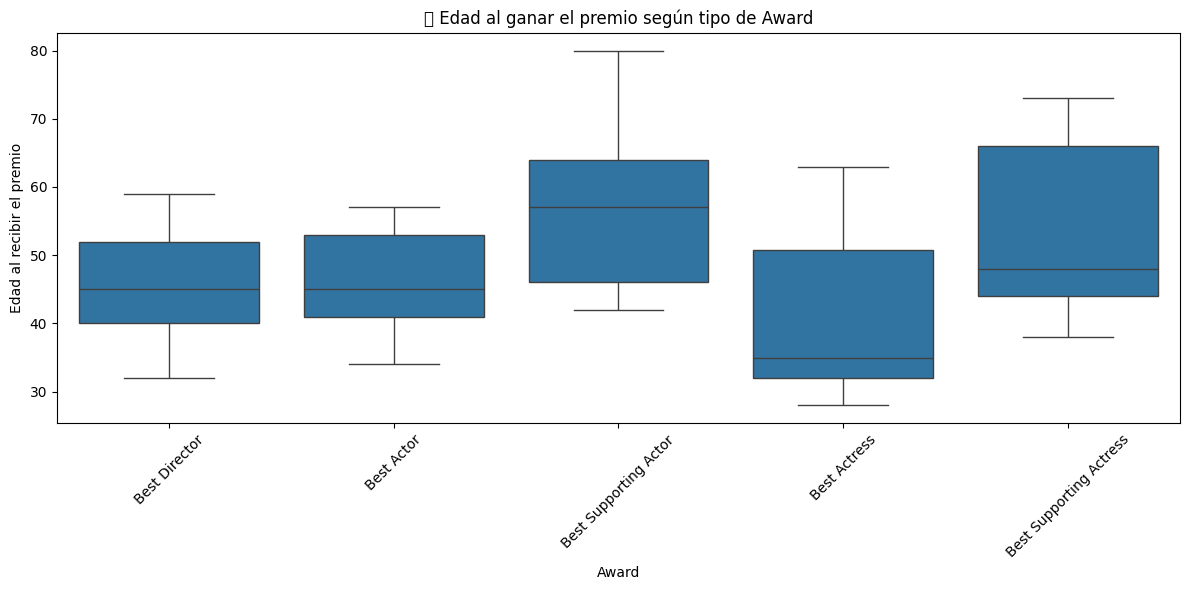

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='award', y='edad_premio', data=data)
plt.xticks(rotation=45)
plt.title('🎬 Edad al ganar el premio según tipo de Award')
plt.xlabel('Award')
plt.ylabel('Edad al recibir el premio')
plt.tight_layout()
plt.show()


In [31]:
import scipy.stats as stats

grupos = [group['edad_premio'].dropna().values for name, group in data.groupby('award')]
f_stat, p_val = stats.f_oneway(*grupos)
print(f"F = {f_stat:.2f}, p = {p_val:.4f}")


F = 4.61, p = 0.0024


Con p = 0.0024 < 0.05, podemos rechazar la hipótesis nula.
✅ Esto significa que hay evidencia estadísticamente significativa de que la edad promedio al ganar varía según el tipo de premio (award).

In [32]:
data.sexual_orientation.value_counts()
"""
No tiene variabilidad para usarse como predictor
1. Desequilibrio extremo

Una sola clase (Straight) domina completamente la variable.
Modelos de ML no aprenden patrones útiles con variables casi constantes.
2. Baja cardinalidad efectiva

Hay 4 clases minoritarias que juntas no alcanzan el 15%, y no tienen peso suficiente para generalizar.
3. Riesgo de sobreajuste

Podría generar ruido o ajustes espurios si se incluye como predictora con tan poca variabilidad real. 
"""

'\nNo tiene variabilidad para usarse como predictor\n1. Desequilibrio extremo\n\nUna sola clase (Straight) domina completamente la variable.\nModelos de ML no aprenden patrones útiles con variables casi constantes.\n2. Baja cardinalidad efectiva\n\nHay 4 clases minoritarias que juntas no alcanzan el 15%, y no tienen peso suficiente para generalizar.\n3. Riesgo de sobreajuste\n\nPodría generar ruido o ajustes espurios si se incluye como predictora con tan poca variabilidad real. \n'

In [33]:
data.drop(columns=['sexual_orientation'], inplace=True)

In [34]:
#Columnas que no tendrán parte en el entrenamiento del modelo 
data.drop(columns=['_unit_id'], inplace=True)
data.drop(columns=['movie'], inplace=True)
data.drop(columns=['person'], inplace=True)

In [35]:
data.birthplace.value_counts()

birthplace
New York City                                      7
Cape Elizabeth, Me                                 4
Swampscott, Ma                                     3
Bisacquino, Sicily, Italy                          3
Los Angeles, Ca                                    3
Mulhouse, Haut-Rhin, Alsace, France                3
Washington, Dc                                     2
Macon, Ga                                          2
Toronto, Ontario, Canada                           2
Chicago, Il                                        2
Helena, Mt                                         2
Milwaukee, Wi                                      2
London, England                                    2
Philadelphia, Pa                                   2
Budapest, Hungary                                  2
Paris, France                                      1
Savannah, Ga                                       1
Cobourg, Ontario, Canada                           1
Montreal, Quebec, Canada           

In [36]:
#Convertimos las ciudades a países para ver si es útil esta columna, como cuidad son demasiadas variables para un modelo de pocos datos
# Diccionario de mapeo de ciudad a país
ciudad_a_pais = {
    'New York City': 'USA',
    'Cape Elizabeth, Me': 'USA',
    'Swampscott, Ma': 'USA',
    'Bisacquino, Sicily, Italy': 'Italy',
    'Los Angeles, Ca': 'USA',
    'Mulhouse, Haut-Rhin, Alsace, France': 'France',
    'Washington, Dc': 'USA',
    'Macon, Ga': 'USA',
    'Toronto, Ontario, Canada': 'Canada',
    'Chicago, Il': 'USA',
    'Helena, Mt': 'USA',
    'Milwaukee, Wi': 'USA',
    'London, England': 'UK',
    'Philadelphia, Pa': 'USA',
    'Budapest, Hungary': 'Hungary',
    'Paris, France': 'France',
    'Savannah, Ga': 'USA',
    'Cobourg, Ontario, Canada': 'Canada',
    'Montreal, Quebec, Canada': 'Canada',
    'Litchfield, Mn': 'USA',
    'Wichita, Ks': 'USA',
    'Hartford, Ct': 'USA',
    'Lima, Oh': 'USA',
    'Palmyra, Mo': 'USA',
    'Athens, Greece': 'Greece',
    'Newtonville, Ma': 'USA',
    'Dublin, Ireland': 'Ireland',
    'Chisinau, Moldova': 'Moldova',
    'Richmond, Surrey, England': 'UK',
    'Elizabeth, Nj': 'USA',
    'Vienna, Austria': 'Austria',
    'Racine, Wi': 'USA',
    'Manhattan, Ny': 'USA',
    'Lviv, Ukraine': 'Ukraine',
    'Tunbridge Wells, Kent, England': 'UK',
    'Cadiz, Oh': 'USA',
    'Victoria Hotel, Scarborough, Yorkshire, England': 'UK',
    'Kansas City, Mo': 'USA',
    'Columbus, Oh': 'USA',
    'Rorschach, Switzerland': 'Switzerland',
    'Pasadena, Ca': 'USA',
    'Glasgow, Scotland': 'UK',
    'Salt Lake City, Ut': 'USA',
    'Quincy, Ma': 'USA'
}


In [37]:
# Crear nueva columna 'country' a partir del diccionario
data['country'] = data['birthplace'].map(ciudad_a_pais)

# Eliminar 'birthplace'
data.drop(columns=['birthplace'], inplace=True)


In [38]:
data['country'].value_counts()

country
USA            45
UK              6
France          4
Canada          4
Italy           3
Hungary         2
Moldova         1
Switzerland     1
Ukraine         1
Austria         1
Ireland         1
Greece          1
Name: count, dtype: int64

In [39]:
#country muy desequilibrado, eliminar
data.drop(columns=['country'], inplace=True)

In [40]:
data.columns

Index(['year_of_award', 'award', 'edad_premio'], dtype='object')

In [41]:
# Separar X (features) e y (target)
X = data[['year_of_award', 'award']].copy()
y = data['edad_premio'].copy()

# One-hot encoding con todas las categorías
X = pd.get_dummies(X, columns=['award'], drop_first=False)




In [42]:
y.describe()

count    70.000000
mean     49.571429
std      11.782536
min      28.000000
25%      41.250000
50%      47.000000
75%      57.000000
max      80.000000
Name: edad_premio, dtype: float64

In [43]:
X.head()

,year_of_award,award_Best Actor,award_Best Actress,award_Best Director,award_Best Supporting Actor,award_Best Supporting Actress
0,1927.0,False,False,True,False,False
3,1932.0,False,False,True,False,False
4,1933.0,False,False,True,False,False
5,1934.0,False,False,True,False,False
6,1935.0,False,False,True,False,False


In [46]:
# Convierte todas las columnas a numérico (booleans → int)
X = X.astype(int)


# Entrenamiento del modelo 

In [44]:
#pip install statsmodels

In [53]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import numpy as np

# Asegurar misma escala y tipos válidos
X_np = sm.add_constant(X.copy()).astype(float).values
y_np = y.values

# Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas por modelo
ols_mae, glm_mae, rlm_mae = [], [], []
ols_r2, glm_r2, rlm_r2 = [], [], []

# Predicciones y valores reales por modelo
y_real_OLS, y_pred_OLS = [], []
y_real_GLM, y_pred_GLM = [], []
y_real_RLM, y_pred_RLM = [], []

for train_idx, test_idx in kf.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_np[train_idx], y_np[test_idx]

    # Asegurar tipo float
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)

    # OLS
    ols_model = sm.OLS(y_train, X_train).fit()
    y_pred_ols = ols_model.predict(X_test)
    ols_mae.append(np.mean(np.abs(y_test - y_pred_ols)))
    ols_r2.append(ols_model.rsquared)
    y_real_OLS.extend(y_test)
    y_pred_OLS.extend(y_pred_ols)

    # GLM
    glm_model = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit()
    y_pred_glm = glm_model.predict(X_test)
    glm_mae.append(np.mean(np.abs(y_test - y_pred_glm)))
    y_real_GLM.extend(y_test)
    y_pred_GLM.extend(y_pred_glm)

    # RLM
    rlm_model = sm.RLM(y_train, X_train).fit()
    y_pred_rlm = rlm_model.predict(X_test)
    rlm_mae.append(np.mean(np.abs(y_test - y_pred_rlm)))
    # No tiene rsquared directamente
    rlm_r2.append(np.nan)
    y_real_RLM.extend(y_test)
    y_pred_RLM.extend(y_pred_rlm)

# Mostrar evolución de MAE y R²
print("📊 MAE por fold:")
print(f"OLS: {ols_mae}")
print(f"GLM: {glm_mae}")
print(f"RLM: {rlm_mae}")

print("\n📈 R² por fold:")
print(f"OLS: {ols_r2}")
print(f"GLM: {glm_r2}")
print(f"RLM: {rlm_r2} (no disponible, se calcula manualmente si se desea)")


📊 MAE por fold:
OLS: [np.float64(5.251878880932687), np.float64(5.96006250797838), np.float64(5.2451652589606965), np.float64(6.918612698649944), np.float64(8.092754564429876)]
GLM: [np.float64(5.251878880932687), np.float64(5.96006250797838), np.float64(5.2451652589606965), np.float64(6.918612698649944), np.float64(8.092754564429876)]
RLM: [np.float64(5.163963734368655), np.float64(5.943865671028464), np.float64(5.848266482070422), np.float64(6.777939494229291), np.float64(7.9590909808438095)]

📈 R² por fold:
OLS: [np.float64(0.5723794522419763), np.float64(0.6313965139680876), np.float64(0.6464669660039248), np.float64(0.5977357082901609), np.float64(0.7063994220852756)]
GLM: []
RLM: [nan, nan, nan, nan, nan] (no disponible, se calcula manualmente si se desea)


In [68]:
# Calcular y mostrar MAE promedio
print("\n📉 MAE promedio por modelo:")
print(f"OLS: {np.mean(ols_mae):.3f}")
print(f"GLM: {np.mean(glm_mae):.3f}")
print(f"RLM: {np.mean(rlm_mae):.3f}")


📉 MAE promedio por modelo:
OLS: 6.294
GLM: 6.294
RLM: 6.339


# Gráficas y Métricas

/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/2443314714.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


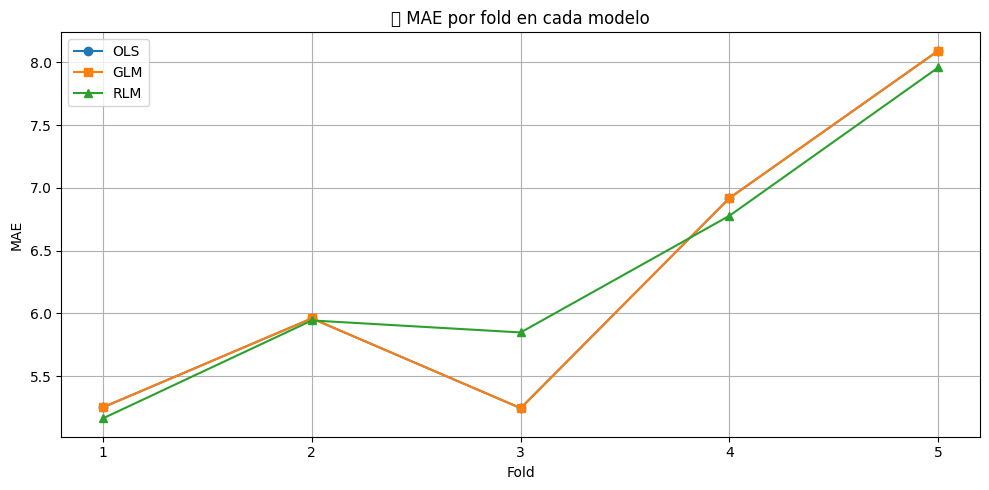

In [54]:
import matplotlib.pyplot as plt
import numpy as np

folds = np.arange(1, 6)
plt.figure(figsize=(10, 5))
plt.plot(folds, ols_mae, label='OLS', marker='o')
plt.plot(folds, glm_mae, label='GLM', marker='s')
plt.plot(folds, rlm_mae, label='RLM', marker='^')

plt.xlabel("Fold")
plt.ylabel("MAE")
plt.title("📊 MAE por fold en cada modelo")
plt.legend()
plt.grid(True)
plt.xticks(folds)
plt.tight_layout()
plt.show()


/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/3819375242.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


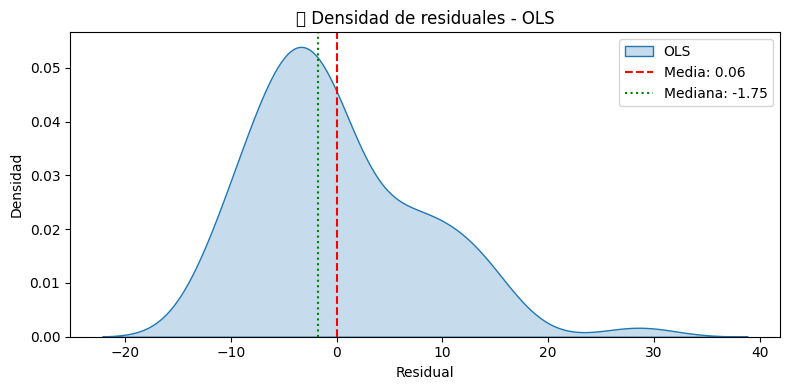

/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/3819375242.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


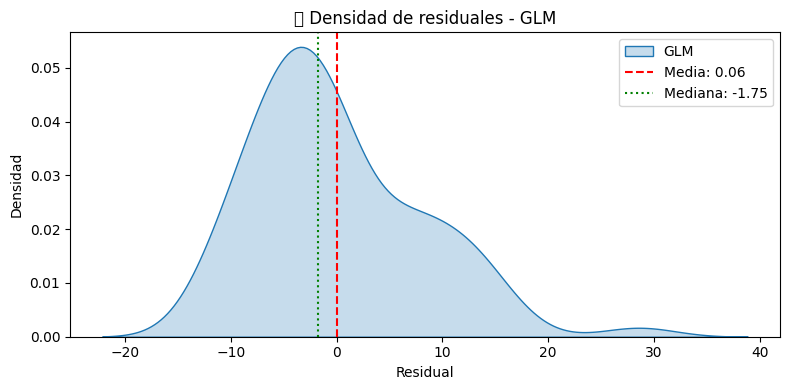

/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/3819375242.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


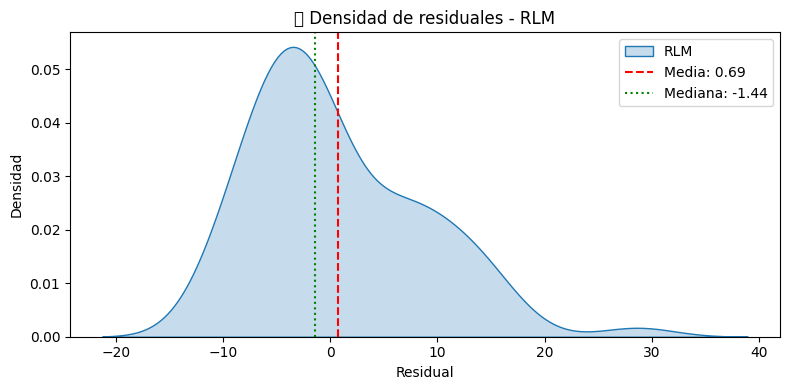

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear diccionario con predicciones y reales
modelos = {
    'OLS': (np.array(y_real_OLS), np.array(y_pred_OLS)),
    'GLM': (np.array(y_real_GLM), np.array(y_pred_GLM)),
    'RLM': (np.array(y_real_RLM), np.array(y_pred_RLM))
}

for nombre, (y_real, y_pred) in modelos.items():
    residuales = y_real - y_pred
    media = np.mean(residuales)
    mediana = np.median(residuales)

    plt.figure(figsize=(8, 4))
    sns.kdeplot(residuales, fill=True, label=f'{nombre}')
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle=':', label=f'Mediana: {mediana:.2f}')
    plt.title(f'📉 Densidad de residuales - {nombre}')
    plt.xlabel("Residual")
    plt.ylabel("Densidad")
    plt.legend()
    plt.tight_layout()
    plt.show()


- RLM es el menos sesgado

/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/1144037126.py:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


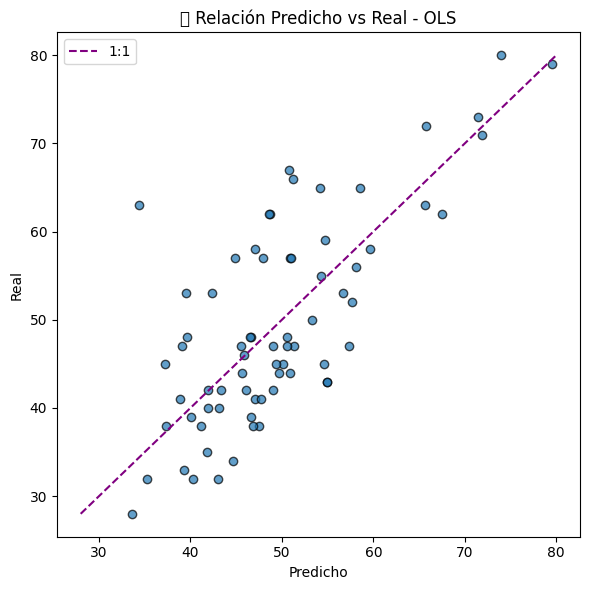

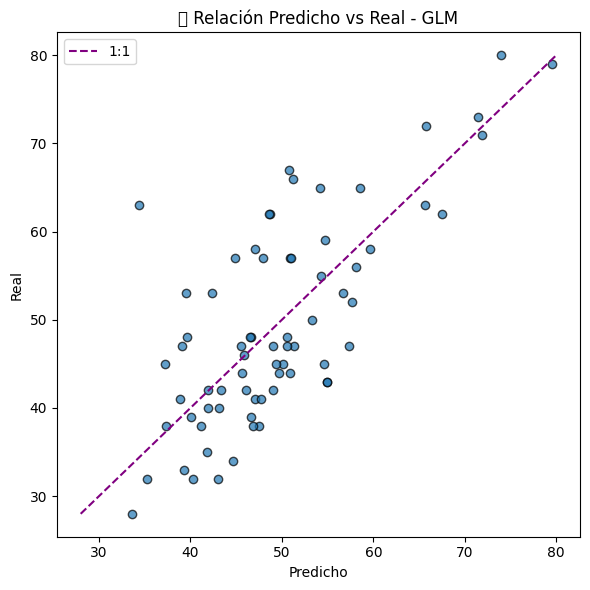

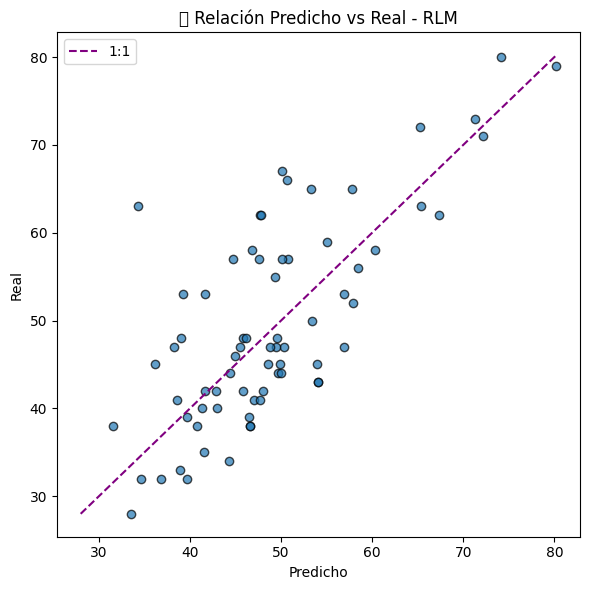

In [57]:
for nombre, (y_real, y_pred) in modelos.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_pred, y_real, alpha=0.7, edgecolors='k')
    lims = [min(min(y_pred), min(y_real)), max(max(y_pred), max(y_real))]
    plt.plot(lims, lims, linestyle='--', color='purple', label='1:1')
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title(f'🎯 Relación Predicho vs Real - {nombre}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [58]:
import pandas as pd
import numpy as np

# Convertir predicciones y reales de RLM en arrays por seguridad
y_real_rlm = np.array(y_real_RLM)
y_pred_rlm = np.array(y_pred_RLM)

# Calcular residuales
residuales_rlm = y_real_rlm - y_pred_rlm

# Encontrar el índice del mayor residual positivo (modelo subestima)
idx_outlier = np.argmax(residuales_rlm)
print(f"Índice del mayor error positivo (modelo subestimó): {idx_outlier}")
print(f"Edad real: {y_real_rlm[idx_outlier]:.2f}, Predicho: {y_pred_rlm[idx_outlier]:.2f}")


Índice del mayor error positivo (modelo subestimó): 66
Edad real: 63.00, Predicho: 34.30


In [59]:
# Filtrar la fila que tiene edad_premio igual a 66
outlier_row = data[data['edad_premio'] == 66]
outlier_row


,year_of_award,award,edad_premio
346,1945.0,Best Supporting Actress,66.0


/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/4127766832.py:21: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


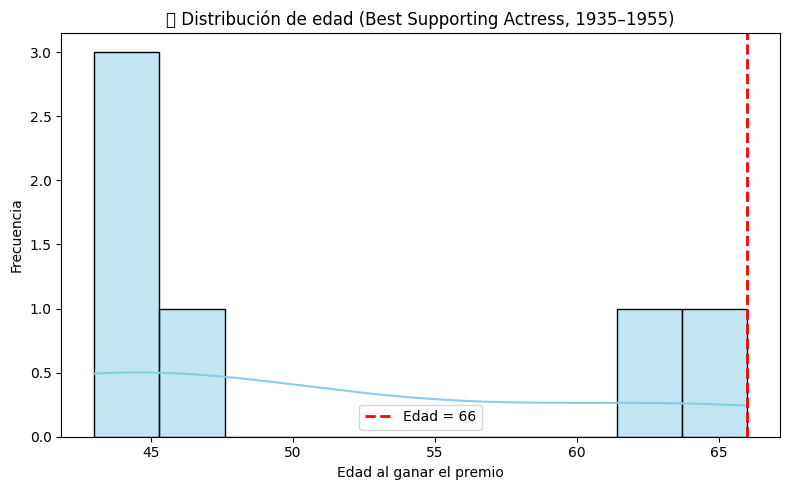

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Refiltrar el grupo si es necesario
grupo_ctx = data[
    (data['award'] == "Best Supporting Actress") &
    (data['year_of_award'] >= 1940) &
    (data['year_of_award'] <= 1950)
]

# Histograma + KDE
plt.figure(figsize=(8, 5))
sns.histplot(grupo_ctx['edad_premio'], kde=True, color='skyblue', bins=10)
plt.axvline(66, color='red', linestyle='--', linewidth=2, label='Edad = 66')

# Títulos y estilo
plt.title("🎬 Distribución de edad (Best Supporting Actress, 1935–1955)")
plt.xlabel("Edad al ganar el premio")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


- No veo evidencia para declararlo outlier.

- Dada la poca data considero clave entregar una medida de incertidumbre utilizando bootstraping 

/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/2373102188.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


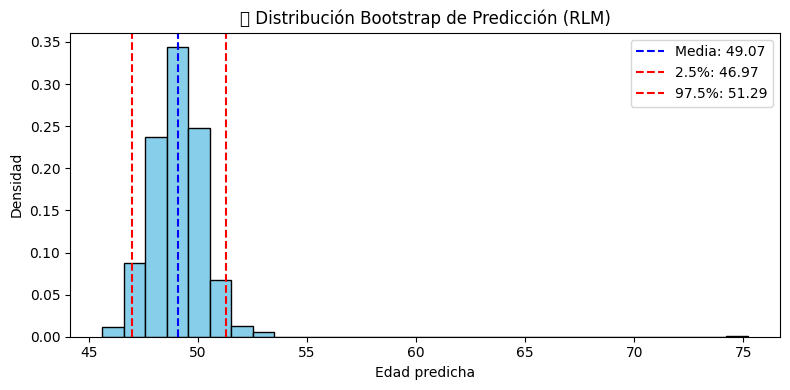

(np.float64(49.07419913019778),
 np.float64(46.96675728714587),
 np.float64(51.289584917304786))

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Agregar constante
X_boot = sm.add_constant(X).astype(float)
y_boot = y.values

# Input de ejemplo: promedio de cada variable
x_input = X_boot.mean().values.reshape(1, -1)

# Bootstrapping
n_iterations = 1000
predicciones = []

for i in range(n_iterations):
    X_sample, y_sample = resample(X_boot, y_boot, random_state=i)
    model = sm.RLM(y_sample, X_sample)
    results = model.fit()
    y_pred = results.predict(x_input)[0]
    predicciones.append(y_pred)

# Resultados de incertidumbre
predicciones = np.array(predicciones)
p2_5 = np.percentile(predicciones, 2.5)
p97_5 = np.percentile(predicciones, 97.5)
media = np.mean(predicciones)

# Graficar distribución
plt.figure(figsize=(8, 4))
plt.hist(predicciones, bins=30, color='skyblue', edgecolor='k', density=True)
plt.axvline(media, color='blue', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(p2_5, color='red', linestyle='--', label=f'2.5%: {p2_5:.2f}')
plt.axvline(p97_5, color='red', linestyle='--', label=f'97.5%: {p97_5:.2f}')
plt.title("📈 Distribución Bootstrap de Predicción (RLM)")
plt.xlabel("Edad predicha")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar resultado numérico
(media, p2_5, p97_5)


In [66]:
import numpy as np

# Asegúrate de que `predicciones` viene del bootstrapping anterior:
# Si no, vuelve a correr el bloque de bootstrapping

# Calcular estadísticos
media_pred = np.mean(predicciones)
p2_5 = np.percentile(predicciones, 2.5)
p97_5 = np.percentile(predicciones, 97.5)
incertidumbre = (p97_5 - p2_5) / 2

# Mostrar resultado
print(f"✅ Predicción final: {media_pred:.2f} ± {incertidumbre:.2f} años (IC 95%)")


✅ Predicción final: 49.07 ± 2.16 años (IC 95%)


- Tenemos un valor para darle a cada predicción como incertidumbre
- Como el tunning no es común en un RLM, aplicaremos Lasso y Ridge para ver si una variables predictora binaria no merece estár en el análisis, buscando una mejora en el rendimiento 


In [67]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

# Estándar: Ridge y Lasso requieren features escaladas
alphas = np.logspace(-2, 2, 50)

# Lasso con CV
lasso = GridSearchCV(
    make_pipeline(StandardScaler(), Lasso(max_iter=10000)),
    param_grid={'lasso__alpha': alphas},
    cv=5,
    scoring='neg_mean_absolute_error'
)
lasso.fit(X, y)

# Ridge con CV
ridge = GridSearchCV(
    make_pipeline(StandardScaler(), Ridge(max_iter=10000)),
    param_grid={'ridge__alpha': alphas},
    cv=5,
    scoring='neg_mean_absolute_error'
)
ridge.fit(X, y)

# Coeficientes con nombres
coef_lasso = pd.Series(lasso.best_estimator_.named_steps['lasso'].coef_, index=X.columns)
coef_ridge = pd.Series(ridge.best_estimator_.named_steps['ridge'].coef_, index=X.columns)

# Mostrar resultados
print("🧹 Variables eliminadas por Lasso (coef = 0):")
print(coef_lasso[coef_lasso == 0].index.tolist())

print("\n🔩 Coeficientes Ridge (más suaves):")
print(coef_ridge.sort_values(ascending=False))


🧹 Variables eliminadas por Lasso (coef = 0):
['award_Best Actor']

🔩 Coeficientes Ridge (más suaves):
year_of_award                    8.151797
award_Best Supporting Actor      0.963277
award_Best Supporting Actress    0.784256
award_Best Actor                -0.264352
award_Best Actress              -0.593187
award_Best Director             -0.946311
dtype: float64


- En base a esto eliminamos award_Best Actor y volvemos a entrenar los modelos 

In [70]:
X.head()

,year_of_award,award_Best Actor,award_Best Actress,award_Best Director,award_Best Supporting Actor,award_Best Supporting Actress
0,1927,0,0,1,0,0
3,1932,0,0,1,0,0
4,1933,0,0,1,0,0
5,1934,0,0,1,0,0
6,1935,0,0,1,0,0


In [71]:
#eliminamos de X award_Best Actor 
X.drop(columns=['award_Best Actor'], inplace=True)

In [72]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import numpy as np

# Asegurar misma escala y tipos válidos
X_np = sm.add_constant(X.copy()).astype(float).values
y_np = y.values

# Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas por modelo
ols_mae, glm_mae, rlm_mae = [], [], []
ols_r2, glm_r2, rlm_r2 = [], [], []

# Predicciones y valores reales por modelo
y_real_OLS, y_pred_OLS = [], []
y_real_GLM, y_pred_GLM = [], []
y_real_RLM, y_pred_RLM = [], []

for train_idx, test_idx in kf.split(X_np):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_np[train_idx], y_np[test_idx]

    # Asegurar tipo float
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)

    # OLS
    ols_model = sm.OLS(y_train, X_train).fit()
    y_pred_ols = ols_model.predict(X_test)
    ols_mae.append(np.mean(np.abs(y_test - y_pred_ols)))
    ols_r2.append(ols_model.rsquared)
    y_real_OLS.extend(y_test)
    y_pred_OLS.extend(y_pred_ols)

    # GLM
    glm_model = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit()
    y_pred_glm = glm_model.predict(X_test)
    glm_mae.append(np.mean(np.abs(y_test - y_pred_glm)))
    y_real_GLM.extend(y_test)
    y_pred_GLM.extend(y_pred_glm)

    # RLM
    rlm_model = sm.RLM(y_train, X_train).fit()
    y_pred_rlm = rlm_model.predict(X_test)
    rlm_mae.append(np.mean(np.abs(y_test - y_pred_rlm)))
    # No tiene rsquared directamente
    rlm_r2.append(np.nan)
    y_real_RLM.extend(y_test)
    y_pred_RLM.extend(y_pred_rlm)

# Mostrar evolución de MAE y R²
print("📊 MAE por fold:")
print(f"OLS: {ols_mae}")
print(f"GLM: {glm_mae}")
print(f"RLM: {rlm_mae}")

print("\n📈 R² por fold:")
print(f"OLS: {ols_r2}")
print(f"GLM: {glm_r2}")
print(f"RLM: {rlm_r2} (no disponible, se calcula manualmente si se desea)")


📊 MAE por fold:
OLS: [np.float64(5.251878880932671), np.float64(5.960062507978348), np.float64(5.2451652589606805), np.float64(6.918612698649732), np.float64(8.092754564429763)]
GLM: [np.float64(5.251878880932671), np.float64(5.960062507978348), np.float64(5.2451652589606805), np.float64(6.918612698649732), np.float64(8.092754564429763)]
RLM: [np.float64(5.1639637343687514), np.float64(5.9438656710285125), np.float64(5.848266482070422), np.float64(6.777939494228917), np.float64(7.959090980843663)]

📈 R² por fold:
OLS: [np.float64(0.5723794522419776), np.float64(0.6313965139680866), np.float64(0.6464669660039231), np.float64(0.5977357082901616), np.float64(0.7063994220852756)]
GLM: []
RLM: [nan, nan, nan, nan, nan] (no disponible, se calcula manualmente si se desea)


In [73]:
# Calcular y mostrar MAE promedio
print("\n📉 MAE promedio por modelo:")
print(f"OLS: {np.mean(ols_mae):.3f}")
print(f"GLM: {np.mean(glm_mae):.3f}")
print(f"RLM: {np.mean(rlm_mae):.3f}")


📉 MAE promedio por modelo:
OLS: 6.294
GLM: 6.294
RLM: 6.339


/var/folders/n9/pdbcn6yx2hldf8l5wtdnq4mc0000gn/T/ipykernel_14584/1144037126.py:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jc_aburto/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


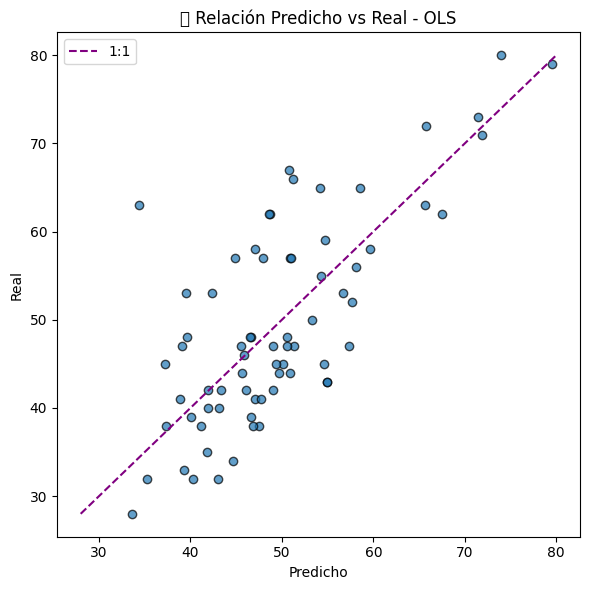

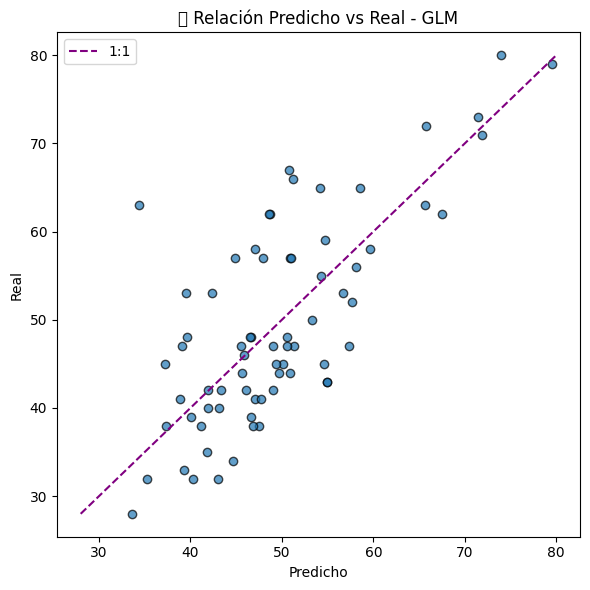

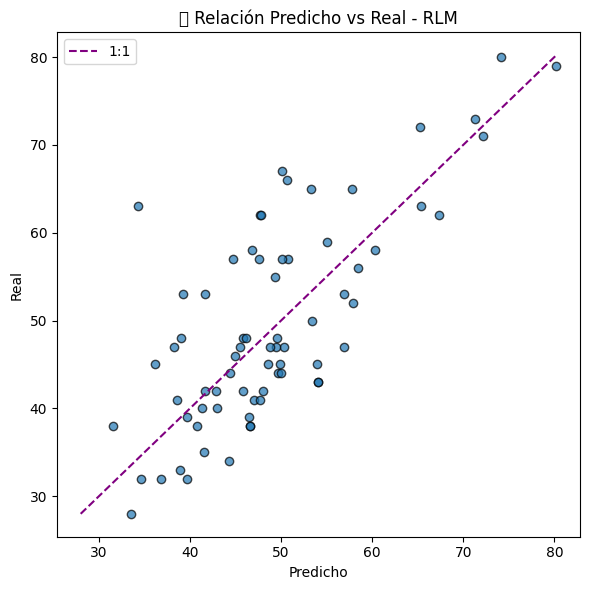

In [74]:
for nombre, (y_real, y_pred) in modelos.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_pred, y_real, alpha=0.7, edgecolors='k')
    lims = [min(min(y_pred), min(y_real)), max(max(y_pred), max(y_real))]
    plt.plot(lims, lims, linestyle='--', color='purple', label='1:1')
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title(f'🎯 Relación Predicho vs Real - {nombre}')
    plt.legend()
    plt.tight_layout()
    plt.show()


- Efectivamente se podía elimninar esa columna binaria, el desempeño es el mismo.

# API REST

In [75]:
import joblib

X_entrenado = sm.add_constant(X).astype(float)
y_entrenado = y
rlm_model = sm.RLM(y_entrenado, X_entrenado).fit()
joblib.dump(rlm_model, "modelo_rlm.pkl")


['modelo_rlm.pkl']